In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_excel('sample_data/221129_A_RoomSchedule.xlsx',sheet_name='ARK_Room Schedule')
df.head()

,Element ID,Name,Number,Level,Base Offset,Department,Dyn_RoomParam_Services,Dyn_Location,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,ER,2113,02,0.0,Plant,NaN,"Point(X = 216974.415, Y = 46959.399, Z = 24985...",216974.415,46959.399,249850.0,0,0.86,BOH
1,50420610,RISER ACCESS,28,GF,0.0,Plant,NaN,"Point(X = 37449.932, Y = 46314.228, Z = 241100...",37449.932,46314.228,241100.0,0,0.00,BOH
2,50420690,JANITOR,7246,B2,150.0,Toilets and Personal Care,NaN,"Point(X = 101346.123, Y = 70816.177, Z = 22770...",101346.123,70816.177,227700.0,0,1.21,BOH
3,50420809,ER,3179,03,0.0,Plant,NaN,"Point(X = 217069.726, Y = 46789.768, Z = 25422...",217069.726,46789.768,254225.0,0,0.59,NaN
4,50420810,ER,2508,A2,0.0,Plant,NaN,"Point(X = 217305.544, Y = 46891.000, Z = 25275...",217305.544,46891.000,252750.0,0,1.17,NaN


In [ ]:
#df=df[(df['Level']=='02')]


In [ ]:
df.shape

(1666, 14)

In [ ]:
df.isnull().sum()

Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1153
Dyn_Location                20
X Value                     20
Y Value                     20
Z value                     20
Area                         0
Volume                      24
Room_Visibility            144
dtype: int64

In [ ]:
#df = df.dropna(subset=['Dyn_Location'])
#df = df.dropna(subset=['Volume'])
#df=df.reset_index(drop=True)
df["Room_Visibility"].fillna("BOH", inplace = True)
print(df.isnull().sum())
df.shape


Element ID                   0
Name                         0
Number                       0
Level                        0
Base Offset                  0
Department                   0
Dyn_RoomParam_Services    1153
Dyn_Location                20
X Value                     20
Y Value                     20
Z value                     20
Area                         0
Volume                      24
Room_Visibility              0
dtype: int64


(1666, 14)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df.Area.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71,
       72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 92,
       97, 99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112, 113,
       114, 115, 117, 119, 121, 123, 124, 127, 131, 137, 138, 140, 141,
       145, 146, 149, 154, 156, 157, 158, 160, 168, 173, 174, 176, 185,
       191, 197, 202, 205, 206, 208, 212, 213, 219, 224, 226, 227, 228,
       231, 233, 234, 236, 237, 242, 246, 248, 251, 261, 265, 274, 276,
       288, 296, 298, 316, 318, 320, 324, 326, 332, 349, 350, 355, 360,
       372, 376, 381, 390, 410, 454, 457, 459, 461, 480, 489, 511, 563,
       566, 571, 588, 593, 645, 656, 673, 681, 686, 688, 690, 697, 717,
       742, 768, 773, 849, 855, 900, 923, 963, 9

In [ ]:
df=df[(df['Area']!='Not')]

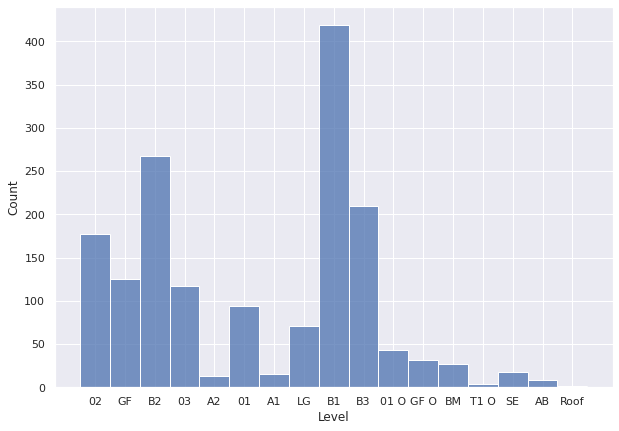

In [ ]:
plt_1 = plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.histplot(x='Level', data=df)
plt.show()

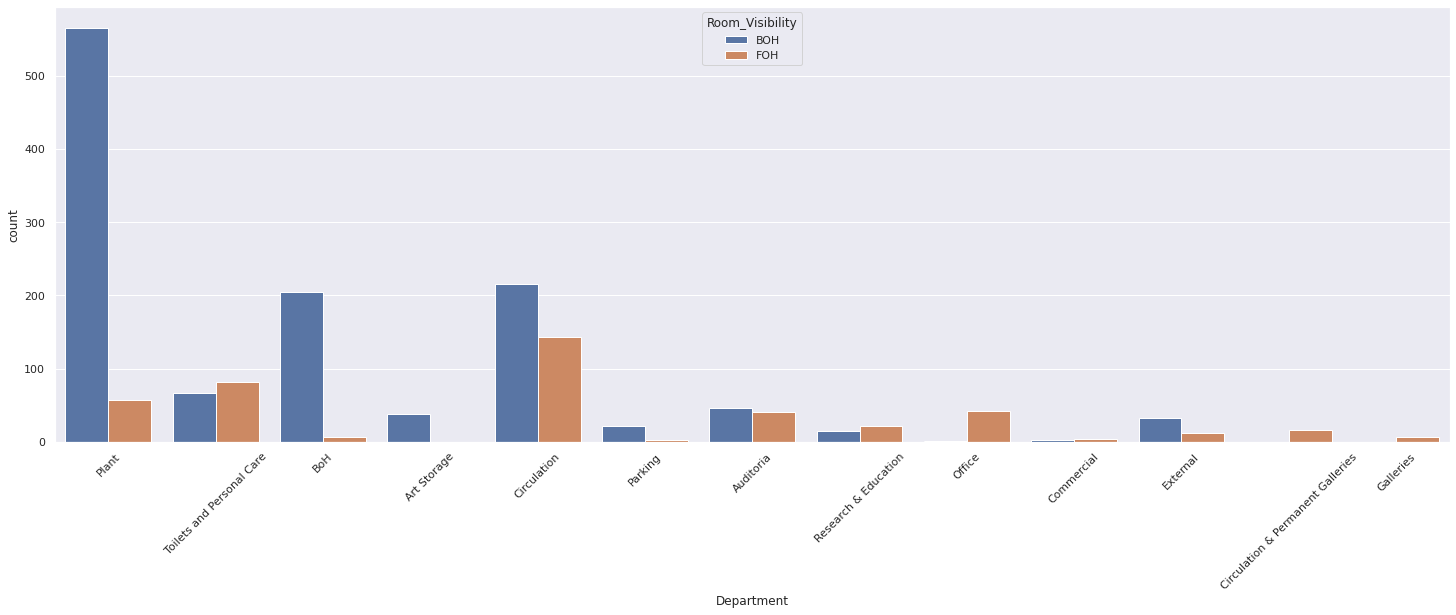

In [ ]:
plt.figure(figsize=(25,8))
ax=sns.countplot(x=df["Department"],hue='Room_Visibility',data=df)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df.Department.unique()

array(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'], dtype=object)

In [ ]:
df['Department'].replace(['Plant', 'Toilets and Personal Care', 'BoH', 'Art Storage',
       'Circulation', 'Parking', 'Auditoria', 'Research & Education',
       'Office', 'Commercial', 'External',
       'Circulation & Permanent Galleries', 'Galleries'],[0,1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df['Room_Visibility'].replace(['FOH', 'BOH'],[0, 1], inplace=True)
df['Level'].replace(['GF', '02','B1','Roof','01','03','B2','SE','LG','AB','B3','A2','A1','BM','GF O','01 O','T1 O'],[0,8,-6,17,4,13,-13,-1,-3,2,-17,11,6,-9,-1,5,1], inplace=True)
#df=df[(df['Level']=='02')]

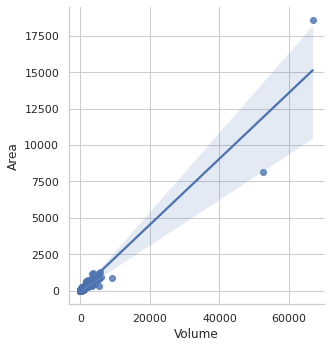

In [ ]:
df['Area'] = df['Area'].apply(pd.to_numeric)
sns.set_style('whitegrid')
sns.lmplot(x ='Volume', y ='Area', data = df)

In [ ]:
#df['Level'] = df['Level'].apply(pd.to_numeric)
df['Room_Visibility'] = df['Room_Visibility'].apply(pd.to_numeric)
df['Department'] = df['Department'].apply(pd.to_numeric)

In [ ]:
df_num = df.copy()
df_num=df_num.select_dtypes(include=np.number)
#df_num=df_num[(df_num['Level']==8)]
#df_num=df_num.set_index('Element ID')
df_num

,Element ID,Number,Level,Base Offset,Department,X Value,Y Value,Z value,Area,Volume,Room_Visibility
0,50420111,2113,8,0.0,0,216974.415,46959.399,249850.0,0,0.86,1
1,50420610,28,0,0.0,0,37449.932,46314.228,241100.0,0,0.00,1
2,50420690,7246,-13,150.0,1,101346.123,70816.177,227700.0,0,1.21,1
3,50420809,3179,13,0.0,0,217069.726,46789.768,254225.0,0,0.59,1
4,50420810,2508,11,0.0,0,217305.544,46891.000,252750.0,0,1.17,1
...,...,...,...,...,...,...,...,...,...,...,...
1637,50690184,2250,8,0.0,11,166882.044,78085.379,249850.0,1154,5049.05,0
1638,50421077,6412,-6,0.0,11,174181.061,76362.180,234600.0,1183,3550.46,0
1639,50419776,79,0,0.0,11,166828.517,76236.824,241100.0,1266,5537.10,0
1640,50421032,7275,-13,0.0,5,157781.783,61519.031,227700.0,8149,52561.15,1


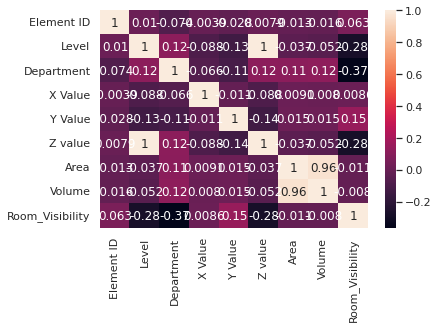

In [ ]:

df_numx=df_num.drop(['Number','Base Offset'],axis=1)
#df_ar=df_num[['Area','Volume']]
sns.heatmap(df_numx.corr(), annot=True)

In [ ]:
df_numx=df_numx.drop(['Volume','Element ID'],axis=1)

In [ ]:
# copy the data
df_min_max_scaled = df_numx.copy()
  
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

df_min_max_scaled

,Level,Department,X Value,Y Value,Z value,Area,Room_Visibility
0,0.735294,0.000000,0.807768,0.338206,0.749284,0.000000,1.0
1,0.500000,0.000000,0.113231,0.333445,0.498567,0.000000,1.0
2,0.117647,0.083333,0.360430,0.514244,0.114613,0.000000,1.0
3,0.882353,0.000000,0.808137,0.336954,0.874642,0.000000,1.0
4,0.823529,0.000000,0.809049,0.337701,0.832378,0.000000,1.0
...,...,...,...,...,...,...,...
1637,0.735294,0.916667,0.613973,0.567883,0.749284,0.062183,0.0
1638,0.323529,0.916667,0.642211,0.555168,0.312321,0.063746,0.0
1639,0.500000,0.916667,0.613766,0.554243,0.498567,0.068219,0.0
1640,0.117647,0.416667,0.578766,0.445641,0.114613,0.439110,1.0


In [ ]:
df_dict_points = df_min_max_scaled.to_dict('records')
df_dict = df_min_max_scaled.to_dict('index')
df_dict

{0: {'Level': 0.7352941176470589,
  'Department': 0.0,
  'X Value': 0.8077680264348852,
  'Y Value': 0.338205889474296,
  'Z value': 0.7492836676217765,
  'Area': 0.0,
  'Room_Visibility': 1.0},
 1: {'Level': 0.5,
  'Department': 0.0,
  'X Value': 0.11323118980884257,
  'Y Value': 0.33344519356297536,
  'Z value': 0.498567335243553,
  'Area': 0.0,
  'Room_Visibility': 1.0},
 2: {'Level': 0.11764705882352941,
  'Department': 0.08333333333333333,
  'X Value': 0.3604301101343417,
  'Y Value': 0.514244281593417,
  'Z value': 0.11461318051575932,
  'Area': 0.0,
  'Room_Visibility': 1.0},
 3: {'Level': 0.8823529411764706,
  'Department': 0.0,
  'X Value': 0.8081367616587914,
  'Y Value': 0.33695418781979936,
  'Z value': 0.8746418338108882,
  'Area': 0.0,
  'Room_Visibility': 1.0},
 4: {'Level': 0.8235294117647058,
  'Department': 0.0,
  'X Value': 0.8090490845074776,
  'Y Value': 0.33770117546880224,
  'Z value': 0.832378223495702,
  'Area': 0.0,
  'Room_Visibility': 1.0},
 5: {'Level': 0.5

In [ ]:
df[df['Number']== 79]

,Element ID,Name,Number,Level,Base Offset,Department,Dyn_RoomParam_Services,Dyn_Location,X Value,Y Value,Z value,Area,Volume,Room_Visibility
1639,50419776,CORRIDOR,79,0,0.0,11,CIRCULATION,"Point(X = 166828.517, Y = 76236.824, Z = 24110...",166828.517,76236.824,241100.0,1266,5537.1,0


In [ ]:
from pandas.util.version import SubLocalType
import random


class Graph(object):
    def __init__(self, cost_matrix: list, rank: float):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        asq=[]
        ark=[]
        best_cost = float('inf')
        best_solution = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]] 
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    
                    
                    best_solution = [] + ant.tabu
                # update pheromone
                ant._update_pheromone_delta()
                ark.append(best_cost)
                asq.append(gen)
            self._update_pheromone(graph, ants)
            
           
            print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        m=np.array(asq)
        n=np.array(ark)
        fig, ax = plt.subplots(figsize=(15, 7))
        ax.plot(asq,ark,label="Best Run")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Performance")
        ax.legend()
        plt.title("Ant Colony Optimization Results (best: {})".format(np.round(best_cost, 2)))
        plt.show()    
        return gen,best_cost, best_solution  #,m,n


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in range(graph.rank)]  # heuristic information

       
        #start = random.randint(0, graph.rank - 1)  # start from any node 
        start = 1639                                  # start from Entrance Volume on GF 
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
   
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

In [ ]:
import operator

import matplotlib.pyplot as plt


def plot(points, path: list):
    x = []
    y = []

    for point in points:
      for u,v in point.items():
        if u=='X Value':
          x.append(v)
        else:
          y.append(v)   
    # noinspection PyUnusedLocal
    y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, max(x) * 1.1)
    # noinspection PyTypeChecker
    plt.ylim(0, max(y) * 1.1)
    plt.show()

generation #0, best cost: 109789.75839601268, path: [1639, 1414, 1060, 1620, 1158, 618, 1624, 1641, 1640, 761, 1449, 1176, 1393, 1563, 278, 853, 1564, 44, 1146, 923, 1162, 1097, 1112, 604, 1312, 1638, 332, 1586, 611, 374, 194, 177, 732, 1248, 5, 1184, 1234, 53, 1045, 1116, 998, 276, 905, 181, 1179, 275, 586, 460, 433, 1630, 1296, 920, 47, 956, 659, 782, 996, 457, 758, 860, 1336, 1557, 482, 165, 803, 1172, 1171, 362, 359, 1619, 733, 1612, 432, 1591, 908, 927, 1125, 409, 1027, 484, 192, 246, 1281, 1287, 912, 166, 1302, 172, 1413, 1410, 1411, 1493, 1635, 295, 1633, 855, 1543, 1262, 737, 841, 1355, 466, 1118, 930, 1427, 669, 941, 427, 265, 341, 1062, 1621, 1273, 1615, 1163, 1357, 1504, 1632, 1374, 829, 118, 1359, 3, 1065, 1426, 346, 647, 1614, 1420, 18, 1149, 169, 749, 673, 419, 1111, 1208, 1590, 784, 408, 1391, 1471, 865, 1637, 1636, 1407, 645, 268, 326, 158, 1608, 1534, 1634, 1119, 1524, 1073, 162, 1365, 821, 925, 922, 474, 626, 1594, 638, 302, 1130, 1375, 726, 1464, 864, 1284, 1236, 151

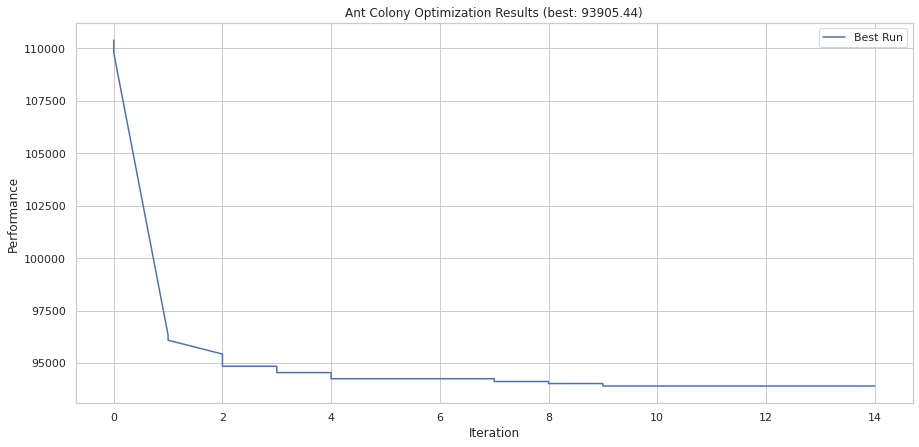

gen: 14,cost: 93905.43930668026, path: [1639, 1618, 1638, 1640, 1641, 276, 1045, 1116, 37, 27, 1385, 575, 974, 1236, 1337, 1189, 609, 1510, 57, 1225, 693, 136, 1375, 709, 957, 497, 638, 777, 1194, 1130, 910, 623, 1464, 731, 1284, 19, 512, 530, 726, 1452, 864, 720, 137, 1560, 1629, 1291, 951, 1209, 1549, 1509, 1169, 1108, 1443, 222, 1567, 190, 1157, 1351, 1148, 368, 988, 1584, 269, 1418, 1084, 61, 414, 690, 370, 989, 1031, 1295, 1572, 131, 1048, 156, 1575, 1007, 1402, 1085, 650, 220, 1190, 1378, 626, 832, 639, 1131, 1381, 1099, 53, 1212, 755, 456, 1366, 478, 1069, 302, 88, 520, 998, 996, 457, 58, 171, 126, 59, 768, 91, 459, 181, 928, 460, 125, 905, 275, 586, 630, 340, 135, 221, 1179, 323, 603, 433, 1369, 1481, 1206, 761, 26, 219, 870, 1539, 1312, 794, 396, 980, 223, 1393, 1241, 277, 187, 440, 441, 1235, 852, 1382, 1039, 315, 446, 904, 604, 1449, 1580, 918, 700, 1154, 781, 921, 1348, 596, 691, 769, 853, 1162, 1002, 923, 31, 434, 1097, 1625, 25, 1293, 202, 225, 1465, 56, 1412, 46, 1098, 1

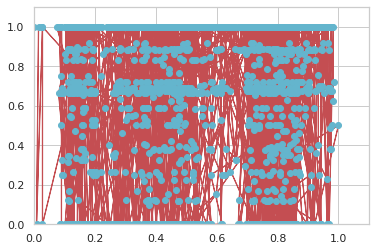

[50419776, 50419940, 50421077, 50421032, 50421052, 50421173, 50420721, 50420052, 50420149, 50419990, 50420215, 50420038, 50420058, 50421098, 50420933, 50421115, 50421033, 50419860, 50420479, 50420378, 50420716, 50421110, 50419832, 50419677, 50419912, 50419847, 50420462, 50421097, 50419849, 50419833, 50420657, 50419988, 50420469, 50420063, 50419859, 51768160, 50420065, 50420465, 50420020, 50420503, 50420064, 50419944, 50421111, 50419858, 50419760, 50420370, 50420367, 50420368, 50420082, 50419713, 50420371, 50420516, 50419661, 50420491, 50566511, 50892940, 50569598, 50420620, 50420663, 50420622, 50420623, 50420625, 50421081, 50420393, 50420517, 50420485, 50420621, 50420624, 50420660, 50420661, 50419642, 50420924, 50421094, 50421082, 50421227, 50421197, 50421128, 50419611, 50421041, 50420521, 50420921, 50420480, 50421180, 50420718, 50420032, 50420463, 50420464, 50420037, 50419641, 50419798, 50420446, 50420839, 50420785, 50420204, 50419835, 50420817, 50420711, 50420242, 50420774, 50420230,

In [ ]:
import math
#import re
#from aco import ACO, Graph
#from plot import plot

#output_room=[]
Result_Dict = {}
#Result_DictPath ={}
 
#def remove(string):
#    pattern = re.compile(r'\s+')
#    return re.sub(pattern, '', string)
MuLOC = 100
MuLvl = 1
MuFOH = 1
MuDeptt = 1
MuArea = 5

#Level Elevation
def lvl_f(li,lj):
  if li == lj:
    return 0
  else:
    return 1/(li-lj)**2


# Area Fucntion
def Area_f3(a):
  return 1/(a+0.1)

# Room_Visibility Fucntion
def FoH_f1(do):
  for q in do:
    if q==0.0:
      return 0
    else:
      return 1

# Department Function
def Dep_f2(Dep1,Dep2):
  if Dep1==Dep2:
    return 0
  else:
    return 1

def Euclidean(city1: dict, city2: dict):
    return math.sqrt((city1['X Value'] - city2['X Value']) ** 2 + (city1['Y Value'] - city2['Y Value']) ** 2  )  ## + (city1['Z value'] - city2['Z value']) ** 2

def distance(city1: dict, city2: dict):
    # dist = MuLOC * math.sqrt((city1['X Value'] - city2['X Value']) ** 2 + (city1['Y Value'] - city2['Y Value']) ** 2 + (city1['Z value'] - city2['Z value']) ** 2) + MuLvl*lvl_f(city1['Level'],city2['Level']) + MuFOH * FoH_f1(city2) + MuDeptt * Dep_f2(city1['Department'],city2['Department']) + MuArea * Vol_f3(city2['Area'])
    dist = MuLOC * math.sqrt((city1['X Value'] - city2['X Value']) ** 2 + (city1['Y Value'] - city2['Y Value']) ** 2 + (city1['Z value'] - city2['Z value']) ** 2) + MuFOH * FoH_f1(city2) + MuDeptt * Dep_f2(city1['Department'],city2['Department']) + MuArea * Area_f3(city2['Area'])
    return dist 

#############################################


def main():
    cities = []
    points = []
    #example1 = "/content/sample_data/room.txt"
    #with open(example1) as f:
        #for line in f.readlines():
            #city = line.split('    ')
            #cities.append(dict(index=int(city[0]), x=float(city[1]), y=int(city[2])))
            #points.append((int(city[1]), int(city[2])))
    cities=df_dict
    points=df_dict_points
    #return cities
    cost_matrix = []
    rank = len(cities)
    for i in range(rank):
        row = []
        for j in range(rank):
            row.append(distance(cities[i], cities[j]))
        cost_matrix.append(row)
    aco = ACO(20, 15, 5.0, 10.0, 0.5, 10, 2)
    graph = Graph(cost_matrix, rank)
    gen,path,cost = aco.solve(graph)
    print('gen: {},cost: {}, path: {}'.format(gen,path,cost))
    Result_Dict[gen] = (cost)
    #Result_DictPath[gen] = (path)

    
    plot(points, cost)
      
if __name__ == '__main__':
  main()
  ElemIdList = []
  for ai in Result_Dict.values():
    for h in ai:
      e = df.iloc[h]["Element ID"]
      ElemIdList.append(e)
  
print(ElemIdList)

In [ ]:
RoomList = []
for ai in Result_Dict.values():
  for h in ai:
     e = df.iloc[h]["Number"]
     RoomList.append(e)

print(RoomList)

[6459, 6022, 6000, 6276, 6249, 6464, 6378, 6308, 6451, 6015, 6345, 6507, 6293, 6362, 6025, 6227, 6230, 6170, 6453, 6456, 6040, 6155, 6080, 6419, 6048, 6397, 6326, 6349, 6147, 6055, 6503, 6108, 6422, 6044, 6036, 6332, 6021, 6122, 6466, 6168, 6469, 6376, 6047, 6337, 6247, 6514, 6095, 6209, 6498, 6030, 6071, 6100, 6096, 6180, 6102, 6038, 6042, 6407, 6412, 6188, 6187, 6413, 6190, 6235, 6110, 6506, 6328, 6027, 6138, 6461, 6311, 6446, 6153, 6305, 6123, 6384, 6074, 6143, 6416, 6379, 6177, 6171, 6167, 6365, 6434, 6028, 6133, 6519, 6134, 6128, 6200, 6394, 6003, 6124, 6064, 6183, 6403, 6082, 6329, 6336, 6423, 6178, 6452, 6182, 6258, 6020, 6268, 6457, 6160, 6241, 6089, 6508, 6317, 6518, 6238, 6099, 6104, 6414, 6115, 6324, 6223, 6195, 6184, 6101, 6263, 6234, 6256, 6141, 6475, 6476, 6129, 6093, 6210, 6310, 6309, 6331, 6076, 6135, 6008, 6291, 6319, 6297, 6401, 6224, 6282, 6427, 6211, 6004, 6350, 6380, 6243, 6105, 6118, 6111, 6406, 6158, 6140, 6289, 6392, 6220, 6454, 6144, 6077, 6052, 6470, 6278, 613

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html